# **MACHINE PROBLEM 3**

**Name:** Maxyne Nuela Ignacio

**Year & Section:** BS Computer Science - IS - 4B

# **Step 1: Uninstall OpenCV Libraries**

In [ ]:
!pip uninstall -y opencv-python opencv-python-headless opencv-contrib-python

# **Step 2: Installing Development Tools and Dependencies**

In [ ]:
#Install necessary development tools and dependencies required to build OpenCV from source.
!apt-get install -y cmake
!apt-get install -y libopencv-dev build-essential cmake git pkg-config libgtk-3-dev \
   libavcodec-dev libavformat-dev libswscale-dev libtbb2 libtbb-dev libjpeg-dev \
   libpng-dev libtiff-dev libdc1394-22-dev libv4l-dev v4l-utils \
   libxvidcore-dev libx264-dev libxine2-dev gstreamer1.0-tools \
   libgstreamer-plugins-base1.0-dev libgstreamer-plugins-good1.0-dev \
   libgtk2.0-dev libtiff5-dev libopenexr-dev libatlas-base-dev \
   python3-dev python3-numpy libtbb-dev libeigen3-dev \
   libfaac-dev libmp3lame-dev libtheora-dev libvorbis-dev \
   libxvidcore-dev libx264-dev yasm libopencore-amrnb-dev \
   libopencore-amrwb-dev libv4l-dev libxine2-dev libtesseract-dev \
   liblapacke-dev libopenblas-dev checkinstall

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libdc1394-22-dev


# **Step 3: Cloning OpenCV from Github**

In [ ]:
#Clone the OpenCV repository from GitHub.
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

Cloning into 'opencv'...
remote: Enumerating objects: 337922, done.
remote: Counting objects: 100% (1142/1142), done.
remote: Compressing objects: 100% (889/889), done.
remote: Total 337922 (delta 499), reused 613 (delta 212), pack-reused 336780 (from 1)
Receiving objects: 100% (337922/337922), 528.64 MiB | 23.29 MiB/s, done.
Resolving deltas: 100% (235638/235638), done.
Updating files: 100% (7568/7568), done.
Cloning into 'opencv_contrib'...
remote: Enumerating objects: 41838, done.
remote: Counting objects: 100% (1588/1588), done.
remote: Compressing objects: 100% (1153/1153), done.
remote: Total 41838 (delta 611), reused 1041 (delta 345), pack-reused 40250 (from 1)
Receiving objects: 100% (41838/41838), 150.38 MiB | 23.03 MiB/s, done.
Resolving deltas: 100% (25744/25744), done.


# **Step 4: Building Open CV from OpenSource**

In [ ]:
#Change directory to the cloned OpenCV directory.
%cd opencv
#Create a build directory for building the OpenCV source.
!mkdir build
#Move into the newly created build directory.
%cd build

#Run the CMake configuration for building OpenCV with specific options:
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
       -D CMAKE_INSTALL_PREFIX=/usr/local \
       -D OPENCV_ENABLE_NONFREE=ON \
       -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
       -D BUILD_EXAMPLES=ON ..

#Compile OpenCV using 8 threads (parallel compilation) for faster build times.
!make -j8
#Install the compiled OpenCV library into the system.
!make install

Streaming output truncated to the last 5000 lines.
[  7%] Building CXX object modules/core/CMakeFiles/opencv_core.dir/sum.avx2.cpp.o
[  7%] Building CXX object modules/core/CMakeFiles/opencv_core.dir/matmul.avx512_skx.cpp.o
[  7%] Linking CXX shared library ../../lib/libopencv_core.so
[  7%] Built target opencv_core
[  7%] Processing OpenCL kernels (imgproc)
[  8%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/flann.cpp.o
[  8%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/ann_mlp.cpp.o
[  8%] Building CXX object modules/hdf/CMakeFiles/opencv_hdf.dir/src/hdf5.cpp.o
[  8%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/miniflann.cpp.o
[  8%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/boost.cpp.o
[  8%] Building CXX object modules/signal/CMakeFiles/opencv_signal.dir/src/signal_resample.cpp.o
[  8%] Building CXX object apps/version/CMakeFiles/opencv_version.dir/opencv_version.cpp.o
[  8%] Building CXX object modules/im

# **Step 5: Load Images**

Mounted at /content/drive


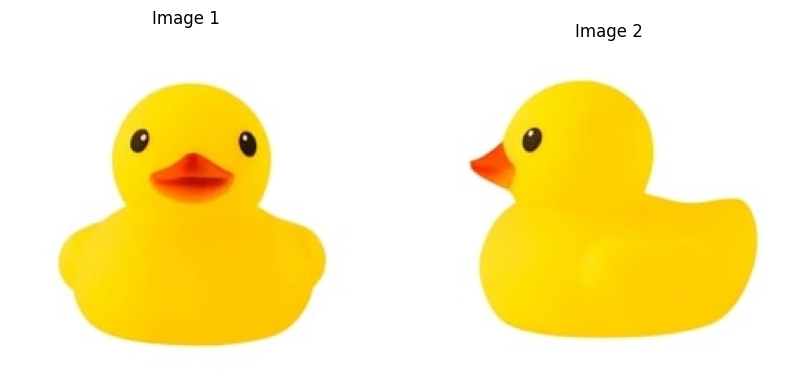

In [ ]:
from google.colab import drive
import cv2
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Set paths to your images in Google Drive
image1_path = '/content/drive/My Drive/01-MP3.jpg'
image2_path = '/content/drive/My Drive/02-MP3.jpg'

# Load the images using OpenCV
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Check if images are loaded correctly
if image1 is None or image2 is None:
    print("Error loading images.")
    if image1 is None:
        print("Image 1 could not be loaded. Check the file path.")
    if image2 is None:
        print("Image 2 could not be loaded. Check the file path.")
else:
    # Convert BGR images to RGB for displaying with Matplotlib
    image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

    # Display the images side-by-side
    plt.figure(figsize=(10, 5))

    # Display Image 1
    plt.subplot(1, 2, 1)
    plt.title("Image 1")
    plt.imshow(image1_rgb)
    plt.axis('off')

    # Display Image 2
    plt.subplot(1, 2, 2)
    plt.title("Image 2")
    plt.imshow(image2_rgb)
    plt.axis('off')

    plt.show()


# **Step 6: Feature Extraction**

In [ ]:
def extract_features(image1, image2):
    #SIFT.
    sift = cv2.SIFT_create()
    kp1_sift, des1_sift = sift.detectAndCompute(image1, None)
    kp2_sift, des2_sift = sift.detectAndCompute(image2, None)

    #SURF.
    surf = cv2.xfeatures2d.SURF_create()
    kp1_surf, des1_surf = surf.detectAndCompute(image1, None)
    kp2_surf, des2_surf = surf.detectAndCompute(image2, None)

    #ORB.
    orb = cv2.ORB_create()
    kp1_orb, des1_orb = orb.detectAndCompute(image1, None)
    kp2_orb, des2_orb = orb.detectAndCompute(image2, None)

    return (kp1_sift, des1_sift, kp2_sift, des2_sift), (kp1_surf, des1_surf, kp2_surf, des2_surf), (kp1_orb, des1_orb, kp2_orb, des2_orb)

#Extract features.
sift_features, surf_features, orb_features = extract_features(image1, image2)


# **Step 7: Displaying Methods for each keypoint**

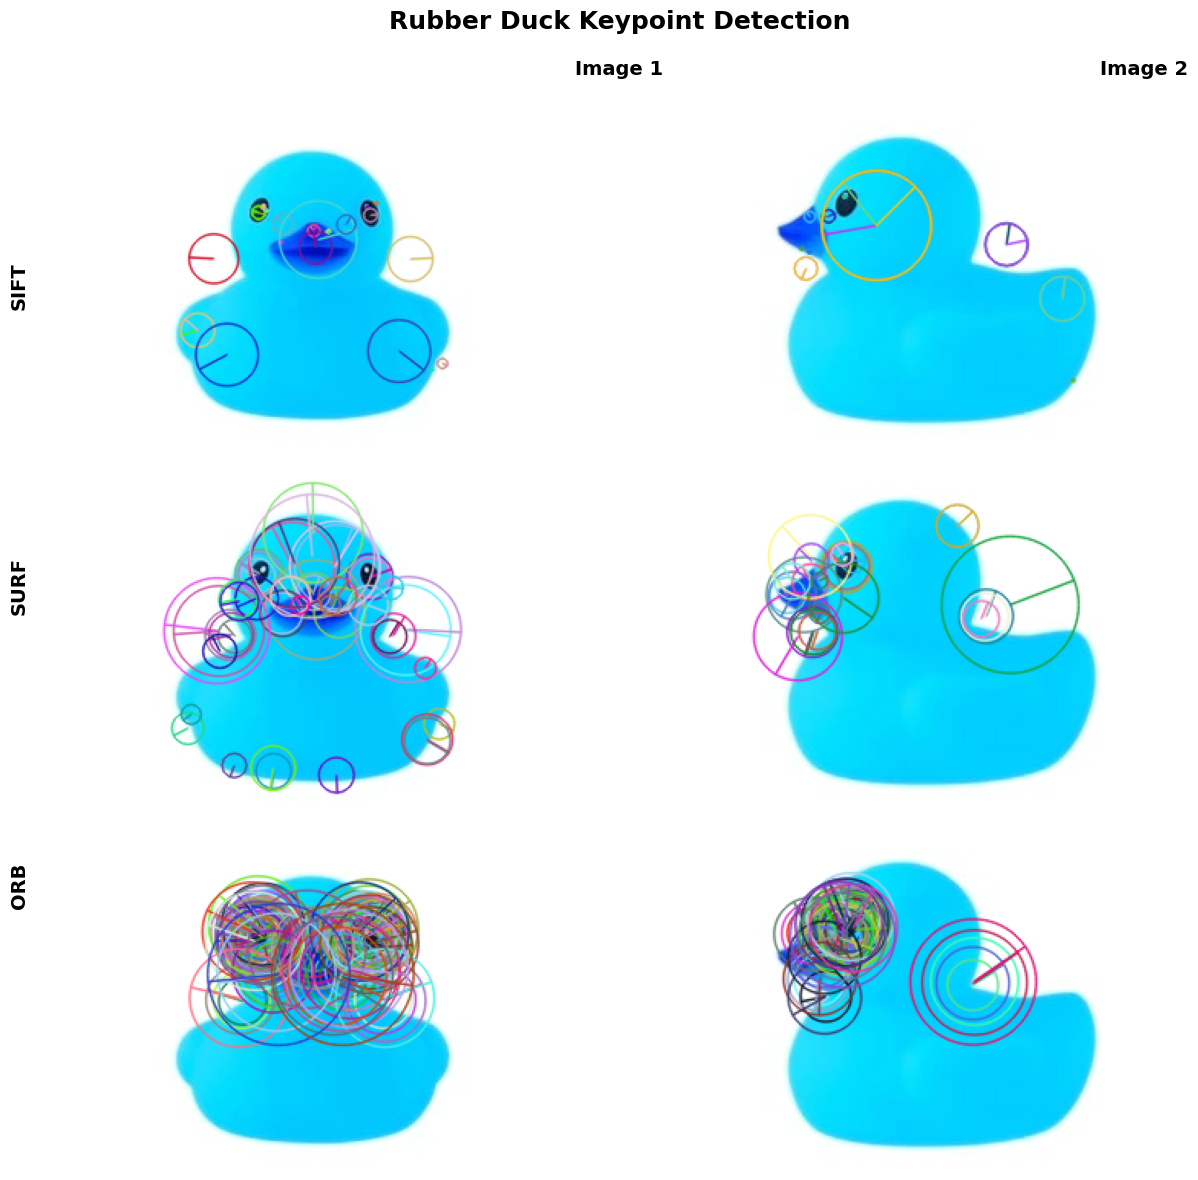

In [ ]:
#Function to draw keypoints.
def draw_keypoints(image, keypoints):
    return cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#Draw keypoints for SIFT.
image1_sift_kp = draw_keypoints(image1, sift_features[0])
image2_sift_kp = draw_keypoints(image2, sift_features[2])

#Draw keypoints for SURF.
image1_surf_kp = draw_keypoints(image1, surf_features[0])
image2_surf_kp = draw_keypoints(image2, surf_features[2])

#Draw keypoints for ORB.
image1_orb_kp = draw_keypoints(image1, orb_features[0])
image2_orb_kp = draw_keypoints(image2, orb_features[2])

# Display the keypoints for each method
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

# Set a main title for the entire figure
fig.suptitle("Rubber Duck Keypoint Detection", fontsize=18, fontweight='bold')

# Row titles
fig.text(0.1, 0.75, "SIFT", ha='center', va='center', rotation='vertical', fontsize=14, fontweight='bold')
fig.text(0.1, 0.5, "SURF", ha='center', va='center', rotation='vertical', fontsize=14, fontweight='bold')
fig.text(0.1, 0.25, "ORB", ha='center', va='center', rotation='vertical', fontsize=14, fontweight='bold')

# Display images with keypoints in each subplot
axs[0, 0].imshow(image1_sift_kp)
axs[0, 0].axis('off')
axs[0, 1].imshow(image2_sift_kp)
axs[0, 1].axis('off')

axs[1, 0].imshow(image1_surf_kp)
axs[1, 0].axis('off')
axs[1, 1].imshow(image2_surf_kp)
axs[1, 1].axis('off')

axs[2, 0].imshow(image1_orb_kp)
axs[2, 0].axis('off')
axs[2, 1].imshow(image2_orb_kp)
axs[2, 1].axis('off')

# Column titles
fig.text(0.5, 0.93, "Image 1", ha='center', va='center', fontsize=14, fontweight='bold')
fig.text(0.85, 0.93, "Image 2", ha='center', va='center', fontsize=14, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title and labels
plt.show()